# Unzipping Data

In [9]:
from zipfile import ZipFile

zip_object = ZipFile("att_faces.zip", "r")
zip_object.extractall("att_faces")
zip_object.close()

# Loading 

In [10]:
from matplotlib import pyplot as plt 

## Generating Data matrix and Labels vector 

In [14]:
import os 

location = os.path.join("att_faces", "s1", "1.pgm")
location

'att_faces\\s1\\1.pgm'

In [32]:
data = []
labels = []

for i in range(1,41):
    folder = str(i) 
    for j in range(1,11):
        file = str(j)
        
        image = plt.imread("att_faces\s"+folder+"/"+file+".pgm")
        data.append(image.flatten())
        
        labels.append(folder)

In [35]:
import numpy as np
data_matrix = np.array(data)

In [39]:
data_matrix

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

In [47]:
labels = np.array(labels)

## Visualizing samples 

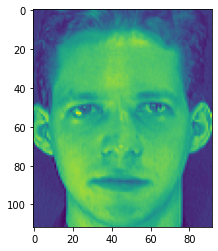

In [44]:
plt.imshow(data[0].reshape(112,92))

In [49]:
x_train = data_matrix[list(range(0,400,2))]
x_test = data_matrix[list(range(1,400,2))]

y_train = labels[list(range(0,400,2))]
y_test = labels[list(range(1,400,2))]


# Data Preprocessing

In [54]:
import numpy as np 

mean = np.mean(x_train, axis=0)
mean

array([86.115, 86.265, 86.685, ..., 76.5  , 77.395, 77.085])

### Centerinng Data (subtracting Mean)

In [55]:
z_train = x_train - mean 
z_train

array([[-38.115, -37.265, -41.685, ..., -29.5  , -31.395, -31.085],
       [-47.115, -42.265, -33.685, ..., -47.5  , -51.395, -48.085],
       [-22.115, -10.265,  -6.685, ..., -41.5  , -40.395, -38.085],
       ...,
       [ 41.885,  38.735,  38.315, ...,   8.5  ,  12.605,   6.915],
       [ 42.885,  40.735,  46.315, ...,  16.5  ,  15.605,  15.915],
       [ 32.885,  33.735,  33.315, ...,  12.5  ,  16.605,   7.915]])

In [60]:
cov_matrix = np.matmul(z_train.T, z_train) / 200
cov_matrix

array([[1241.511775, 1237.489525, 1220.456225, ...,  -69.8075  ,
         -99.755425,  -43.884775],
       [1237.489525, 1250.244775, 1227.058475, ...,  -81.5325  ,
        -110.499675,  -55.222525],
       [1220.456225, 1227.058475, 1222.145775, ...,  -79.0825  ,
        -114.060575,  -67.653225],
       ...,
       [ -69.8075  ,  -81.5325  ,  -79.0825  , ..., 1894.      ,
        1865.0575  , 1682.5425  ],
       [ -99.755425, -110.499675, -114.060575, ..., 1865.0575  ,
        1970.238975, 1809.101425],
       [ -43.884775,  -55.222525,  -67.653225, ..., 1682.5425  ,
        1809.101425, 1888.737775]])

In [57]:
conv_matrix_2 = np.cov(x_train, rowvar=False, bias=True)
conv_matrix_2

array([[1241.511775, 1237.489525, 1220.456225, ...,  -69.8075  ,
         -99.755425,  -43.884775],
       [1237.489525, 1250.244775, 1227.058475, ...,  -81.5325  ,
        -110.499675,  -55.222525],
       [1220.456225, 1227.058475, 1222.145775, ...,  -79.0825  ,
        -114.060575,  -67.653225],
       ...,
       [ -69.8075  ,  -81.5325  ,  -79.0825  , ..., 1894.      ,
        1865.0575  , 1682.5425  ],
       [ -99.755425, -110.499675, -114.060575, ..., 1865.0575  ,
        1970.238975, 1809.101425],
       [ -43.884775,  -55.222525,  -67.653225, ..., 1682.5425  ,
        1809.101425, 1888.737775]])

# Calculating Eigenvalues and Eignevectors 

In [62]:
eigenvalues, eigenvectors = np.linalg.eig(conv_matrix_2)


In [100]:
sorted_eigenvalues_indices = eigenvalues.argsort()[::-1]
sorted_eigenvalues_indices = sorted_eigenvalues_indices
sorted_eigenvalues_indices

array([  0,   1,   2, ..., 202, 200, 201], dtype=int64)

In [101]:
sorted_eigenvalues = eigenvalues[sorted_eigenvalues_indices]
sorted_eigenvectors = eigenvectors[:,sorted_eigenvalues_indices]

print(sorted_eigenvalues)
print(sorted_eigenvectors)

[ 2.89336806e+06+0.00000000e+00j  2.01725036e+06+0.00000000e+00j
  1.14824189e+06+0.00000000e+00j ... -6.25069878e-11+0.00000000e+00j
 -8.01589040e-11+2.98702045e-11j -8.01589040e-11-2.98702045e-11j]
[[ 0.00281623+0.00000000e+00j -0.01361156+0.00000000e+00j
  -0.02055771+0.00000000e+00j ... -0.00154415+0.00000000e+00j
   0.00303181-1.42046108e-03j  0.00303181+1.42046108e-03j]
 [ 0.00278538+0.00000000e+00j -0.01372372+0.00000000e+00j
  -0.02051844+0.00000000e+00j ... -0.00010312+0.00000000e+00j
   0.00438805-9.06373438e-03j  0.00438805+9.06373438e-03j]
 [ 0.00255135+0.00000000e+00j -0.01375542+0.00000000e+00j
  -0.02030213+0.00000000e+00j ...  0.00076887+0.00000000e+00j
   0.01297473-3.59658724e-03j  0.01297473+3.59658724e-03j]
 ...
 [ 0.0054346 +0.00000000e+00j  0.01151936+0.00000000e+00j
  -0.01558413+0.00000000e+00j ... -0.01093618+0.00000000e+00j
   0.00546136-3.01921942e-04j  0.00546136+3.01921942e-04j]
 [ 0.00555782+0.00000000e+00j  0.01183526+0.00000000e+00j
  -0.01481205+0.00000

In [102]:
sorted_eigenvalues[0]

(2893368.0588590577+0j)

## Plotting Eigenvalues to detemrin number of vectors to consider

C:\Users\cm_El\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


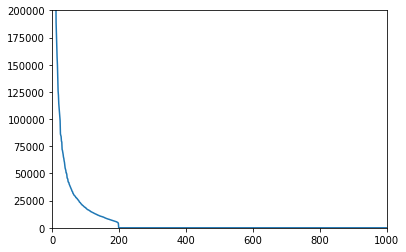

In [82]:
plt.plot(range(0,1000), sorted_eigenvalues[0:1000])
plt.axis([0,1000,0,200000])
plt.show()

# Data transformation

In [103]:
eigen_basis = sorted_eigenvectors[0:200]
eigen_basis_values = sorted_eigenvalues[0:200]

In [104]:
eigen_basis

array([[ 2.81623260e-03+0.j        , -1.36115565e-02+0.j        ,
        -2.05577118e-02+0.j        , ..., -1.54415422e-03+0.j        ,
         3.03181345e-03-0.00142046j,  3.03181345e-03+0.00142046j],
       [ 2.78538278e-03+0.j        , -1.37237246e-02+0.j        ,
        -2.05184388e-02+0.j        , ..., -1.03120025e-04+0.j        ,
         4.38804859e-03-0.00906373j,  4.38804859e-03+0.00906373j],
       [ 2.55134713e-03+0.j        , -1.37554242e-02+0.j        ,
        -2.03021295e-02+0.j        , ...,  7.68869086e-04+0.j        ,
         1.29747264e-02-0.00359659j,  1.29747264e-02+0.00359659j],
       ...,
       [ 1.02729733e-03+0.j        , -1.40336424e-02+0.j        ,
        -1.98979730e-02+0.j        , ...,  9.48276831e-04+0.j        ,
        -8.47553125e-03+0.0065003j , -8.47553125e-03-0.0065003j ],
       [-5.84563260e-05+0.j        , -1.35963719e-02+0.j        ,
        -1.97187632e-02+0.j        , ...,  3.30617828e-03+0.j        ,
        -4.39971693e-03+0.00599235j

In [105]:
eigen_basis.shape

(200, 10304)

In [106]:
data_matrix.shape

(400, 10304)

In [112]:
new_data = np.dot(eigen_basis, data_matrix.T)

In [113]:
new_data.T.shape

(400, 200)